## PCA Model for Image Reconstruction

### Loading the pre-processed dataset

In [32]:
# load the mnist dataset
import numpy as np
file_path = "C:\\Users\\HP\\Desktop\\Image-Reconstruction\\Data\\mnist_preprocessed.npz"

In [33]:
data = np.load(file_path)
X_train = data["X_train"]
X_test = data["X_test"]

In [34]:
X_train.shape

(60000, 784)

In [35]:
X_test.shape

(10000, 784)

### PCA Computation

In [36]:
# get the covariance matrix
covariance_matrix = np.cov(X_train.T)
covariance_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvalues)

[ 5.11687307e+00  3.74139088e+00  3.25270849e+00  2.84162073e+00
  2.56711776e+00  2.27366341e+00  1.72515500e+00  1.52056025e+00
  1.45630527e+00  1.24275010e+00  1.11208952e+00  1.06664055e+00
  9.04680841e-01  8.92181231e-01  8.32353055e-01  7.81900331e-01
  6.98386876e-01  6.73255818e-01  6.25995245e-01  6.07763026e-01
  5.62145885e-01  5.30798833e-01  5.02780259e-01  4.81147036e-01
  4.65783204e-01  4.42538693e-01  4.28439610e-01  4.14618710e-01
  3.92667340e-01  3.64261794e-01  3.46985961e-01  3.41741893e-01
  3.17734286e-01  3.09280823e-01  3.00549036e-01  2.86632714e-01
  2.66680513e-01  2.57227911e-01  2.53838023e-01  2.49006740e-01
  2.40823991e-01  2.34543856e-01  2.20658653e-01  2.09962679e-01
  2.02981382e-01  1.97776691e-01  1.90872478e-01  1.85379716e-01
  1.79298799e-01  1.69711256e-01  1.68204657e-01  1.64929265e-01
  1.56059568e-01  1.52353955e-01  1.49810351e-01  1.42107651e-01
  1.43117014e-01  1.36282013e-01  1.33802866e-01  1.29062999e-01
  1.26809058e-01  1.26153

In [40]:
print(eigenvectors)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [48]:
# sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

In [52]:
# get list of top eigenvectors
k_values = [2,4,8,16,32,64]
selected_eigenvectors = [sorted_eigenvectors[:, :k] for k in k_values]
selected_eigenvectors[5].shape

(784, 64)

## Dimensionality Reduction

In [63]:
# get the latent feature vector
reduced_data_list = [np.dot(X_train, eigen) for eigen in selected_eigenvectors]

## Reconstructed Vectors

In [65]:
# get reonstructed vector X_train' 
reconstructed_data_list = [np.dot(reduced_data, eigen.T) for reduced_data, eigen in zip(reduced_data_list, selected_eigenvectors)]

In [66]:
reconstructed_data_list[0].shape

(60000, 784)

## Get Mean squared errors

In [67]:
from sklearn.metrics import mean_squared_error
reconstruction_error_list = [mean_squared_error(X_train, reconstructed_data) for reconstructed_data in reconstructed_data_list]

In [68]:
print(reconstruction_error_list)

[0.08946332950607615, 0.07645447458247269, 0.0442315990204937, 0.028733765732063567, 0.017572158644000323, 0.009390719151064292]


## Images Reconstructed

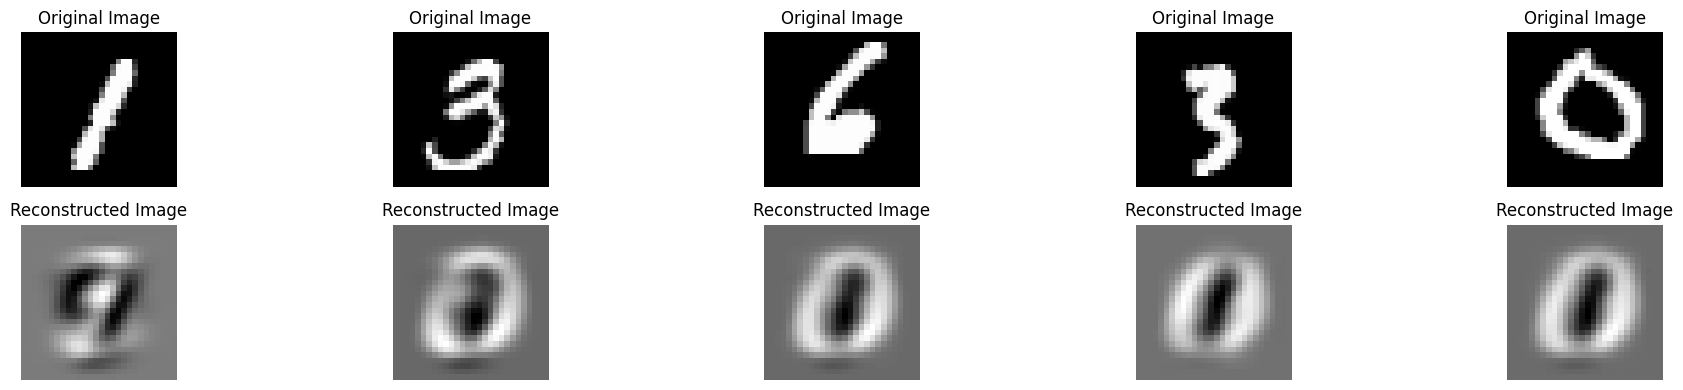

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train contains the training images and selected_eigenvectors is a list containing eigenvectors for each k value
original_image_shape = (28,28)

# Select random 5 images from X_train
random_indices = np.random.choice(len(X_train), 5, replace=False)
random_images = X_train[random_indices]

# Randomly select a value of k (number of principal components)
random_k_index = 0
selected_eigenvectors_k = selected_eigenvectors[random_k_index]

# Project random images onto subspace
projected_random_images = np.dot(random_images, selected_eigenvectors_k)  # Transpose selected eigenvectors

# Reconstruct random images
reconstructed_random_images = np.dot(projected_random_images, selected_eigenvectors_k.T)

# Reshape reconstructed images to original shape
reconstructed_random_images = reconstructed_random_images.reshape(-1, original_image_shape[0], original_image_shape[1])  # Assuming original_image_shape is the shape of the original images

# Display original and reconstructed images
num_images = len(random_indices)
plt.figure(figsize=(num_images * 4, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.title('Original Image')
    plt.imshow(random_images[i].reshape(original_image_shape), cmap='gray')
    plt.axis('off')

    plt.subplot(2, num_images, num_images + i + 1)
    plt.title('Reconstructed Image')
    plt.imshow(reconstructed_random_images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

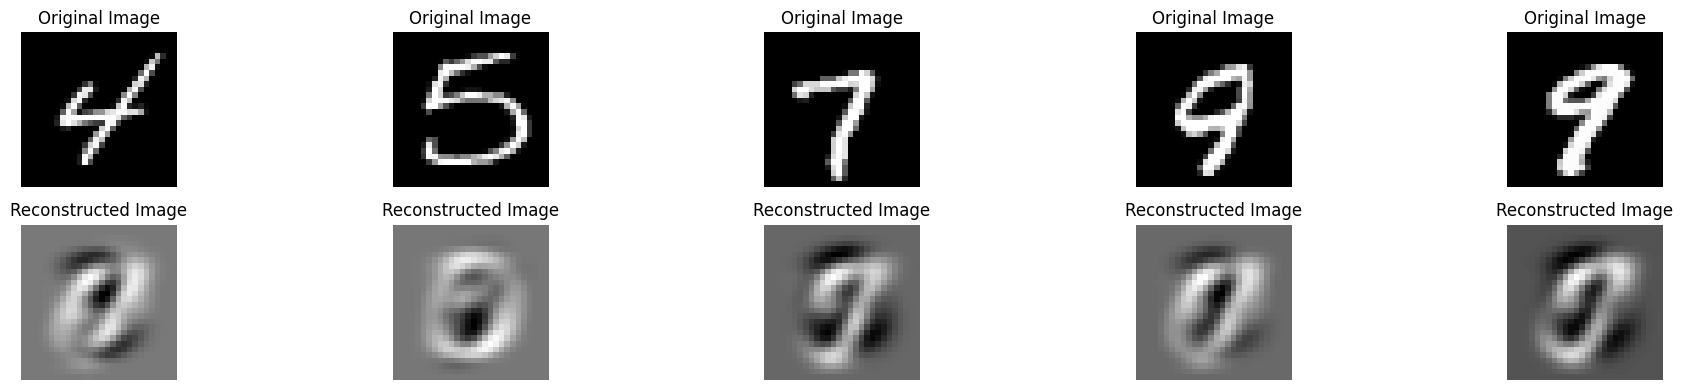

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train contains the training images and selected_eigenvectors is a list containing eigenvectors for each k value
original_image_shape = (28,28)

# Select random 5 images from X_train
random_indices = np.random.choice(len(X_train), 5, replace=False)
random_images = X_train[random_indices]

# Randomly select a value of k (number of principal components)
random_k_index = 1
selected_eigenvectors_k = selected_eigenvectors[random_k_index]

# Project random images onto subspace
projected_random_images = np.dot(random_images, selected_eigenvectors_k)  # Transpose selected eigenvectors

# Reconstruct random images
reconstructed_random_images = np.dot(projected_random_images, selected_eigenvectors_k.T)

# Reshape reconstructed images to original shape
reconstructed_random_images = reconstructed_random_images.reshape(-1, original_image_shape[0], original_image_shape[1])  # Assuming original_image_shape is the shape of the original images

# Display original and reconstructed images
num_images = len(random_indices)
plt.figure(figsize=(num_images * 4, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.title('Original Image')
    plt.imshow(random_images[i].reshape(original_image_shape), cmap='gray')
    plt.axis('off')

    plt.subplot(2, num_images, num_images + i + 1)
    plt.title('Reconstructed Image')
    plt.imshow(reconstructed_random_images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

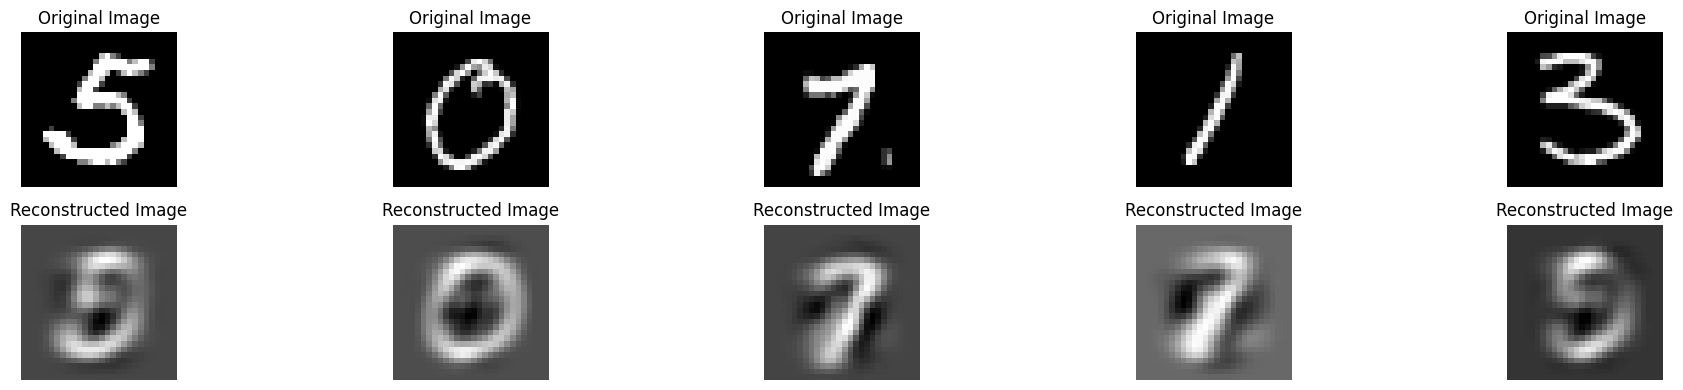

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train contains the training images and selected_eigenvectors is a list containing eigenvectors for each k value
original_image_shape = (28,28)

# Select random 5 images from X_train
random_indices = np.random.choice(len(X_train), 5, replace=False)
random_images = X_train[random_indices]

# Randomly select a value of k (number of principal components)
random_k_index = 2
selected_eigenvectors_k = selected_eigenvectors[random_k_index]

# Project random images onto subspace
projected_random_images = np.dot(random_images, selected_eigenvectors_k)  # Transpose selected eigenvectors

# Reconstruct random images
reconstructed_random_images = np.dot(projected_random_images, selected_eigenvectors_k.T)

# Reshape reconstructed images to original shape
reconstructed_random_images = reconstructed_random_images.reshape(-1, original_image_shape[0], original_image_shape[1])  # Assuming original_image_shape is the shape of the original images

# Display original and reconstructed images
num_images = len(random_indices)
plt.figure(figsize=(num_images * 4, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.title('Original Image')
    plt.imshow(random_images[i].reshape(original_image_shape), cmap='gray')
    plt.axis('off')

    plt.subplot(2, num_images, num_images + i + 1)
    plt.title('Reconstructed Image')
    plt.imshow(reconstructed_random_images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

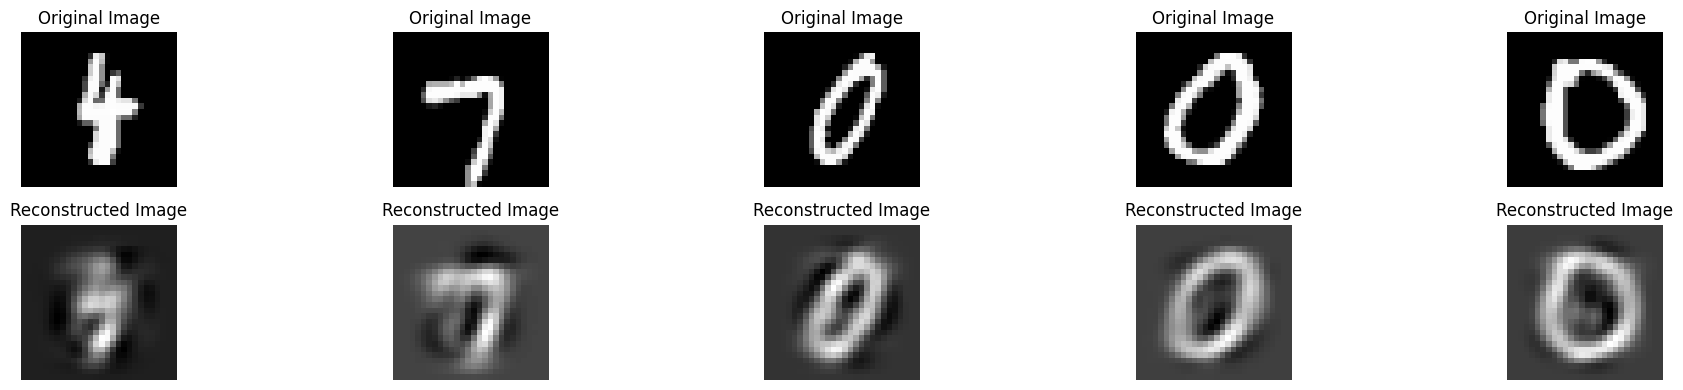

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train contains the training images and selected_eigenvectors is a list containing eigenvectors for each k value
original_image_shape = (28,28)

# Select random 5 images from X_train
random_indices = np.random.choice(len(X_train), 5, replace=False)
random_images = X_train[random_indices]

# Randomly select a value of k (number of principal components)
random_k_index = 3
selected_eigenvectors_k = selected_eigenvectors[random_k_index]

# Project random images onto subspace
projected_random_images = np.dot(random_images, selected_eigenvectors_k)  # Transpose selected eigenvectors

# Reconstruct random images
reconstructed_random_images = np.dot(projected_random_images, selected_eigenvectors_k.T)

# Reshape reconstructed images to original shape
reconstructed_random_images = reconstructed_random_images.reshape(-1, original_image_shape[0], original_image_shape[1])  # Assuming original_image_shape is the shape of the original images

# Display original and reconstructed images
num_images = len(random_indices)
plt.figure(figsize=(num_images * 4, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.title('Original Image')
    plt.imshow(random_images[i].reshape(original_image_shape), cmap='gray')
    plt.axis('off')

    plt.subplot(2, num_images, num_images + i + 1)
    plt.title('Reconstructed Image')
    plt.imshow(reconstructed_random_images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

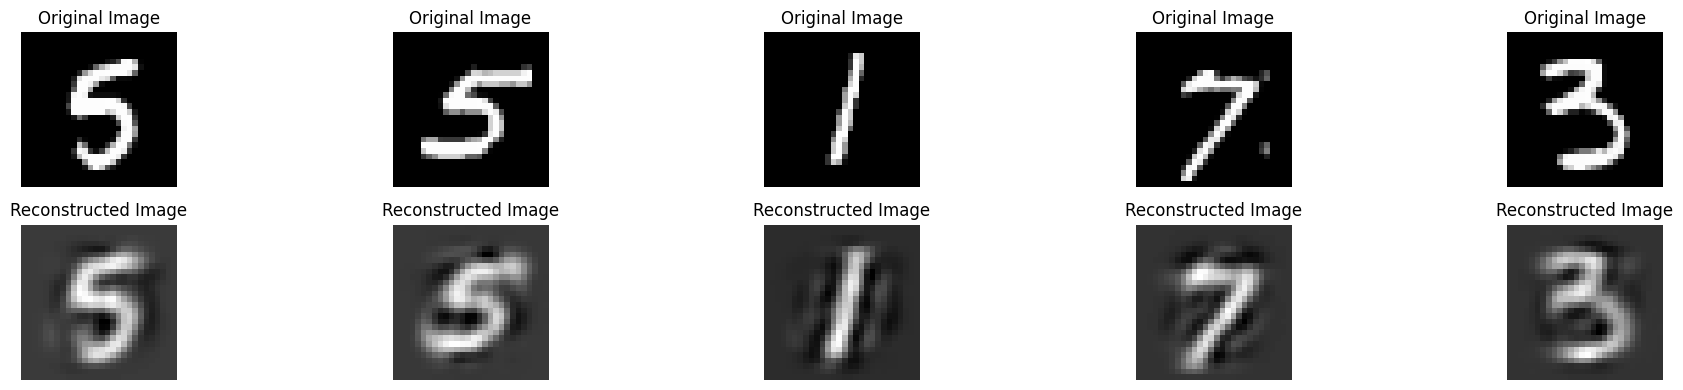

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train contains the training images and selected_eigenvectors is a list containing eigenvectors for each k value
original_image_shape = (28,28)

# Select random 5 images from X_train
random_indices = np.random.choice(len(X_train), 5, replace=False)
random_images = X_train[random_indices]

# Randomly select a value of k (number of principal components)
random_k_index = 4
selected_eigenvectors_k = selected_eigenvectors[random_k_index]

# Project random images onto subspace
projected_random_images = np.dot(random_images, selected_eigenvectors_k)  # Transpose selected eigenvectors

# Reconstruct random images
reconstructed_random_images = np.dot(projected_random_images, selected_eigenvectors_k.T)

# Reshape reconstructed images to original shape
reconstructed_random_images = reconstructed_random_images.reshape(-1, original_image_shape[0], original_image_shape[1])  # Assuming original_image_shape is the shape of the original images

# Display original and reconstructed images
num_images = len(random_indices)
plt.figure(figsize=(num_images * 4, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.title('Original Image')
    plt.imshow(random_images[i].reshape(original_image_shape), cmap='gray')
    plt.axis('off')

    plt.subplot(2, num_images, num_images + i + 1)
    plt.title('Reconstructed Image')
    plt.imshow(reconstructed_random_images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

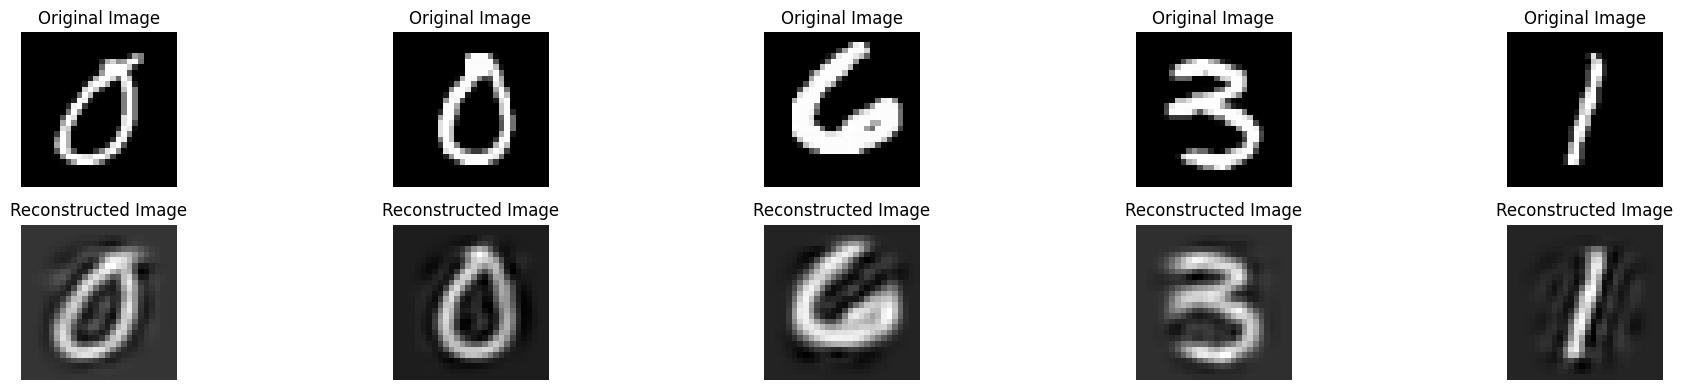

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train contains the training images and selected_eigenvectors is a list containing eigenvectors for each k value
original_image_shape = (28,28)

# Select random 5 images from X_train
random_indices = np.random.choice(len(X_train), 5, replace=False)
random_images = X_train[random_indices]

# Randomly select a value of k (number of principal components)
random_k_index = 5
selected_eigenvectors_k = selected_eigenvectors[random_k_index]

# Project random images onto subspace
projected_random_images = np.dot(random_images, selected_eigenvectors_k)  # Transpose selected eigenvectors

# Reconstruct random images
reconstructed_random_images = np.dot(projected_random_images, selected_eigenvectors_k.T)

# Reshape reconstructed images to original shape
reconstructed_random_images = reconstructed_random_images.reshape(-1, original_image_shape[0], original_image_shape[1])  # Assuming original_image_shape is the shape of the original images

# Display original and reconstructed images
num_images = len(random_indices)
plt.figure(figsize=(num_images * 4, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.title('Original Image')
    plt.imshow(random_images[i].reshape(original_image_shape), cmap='gray')
    plt.axis('off')

    plt.subplot(2, num_images, num_images + i + 1)
    plt.title('Reconstructed Image')
    plt.imshow(reconstructed_random_images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()